## Statistics Game Logo (R) - Ethan, Molly, and Ian

In the following cells, a logo for our game, `[GAME NAME]`, will be created.

### 1.0 - Install and Load the Necessary Packages
We use `ggplot2` and `dplyr` from `tidyverse`, as well as `geomtextpath`.

*Note: we should ask Kalim if it is alright to install `geomtextpath`.*

In [1]:
# Install and load the libraries
install.packages(c('geomtextpath', 'tidyverse'), repos='http://cran.us.r-project.org')

library(ggplot2)
library(dplyr)
library(geomtextpath)

Installing packages into 'C:/Users/ethan/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'geomtextpath' successfully unpacked and MD5 sums checked
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ethan\AppData\Local\Temp\Rtmp6Jpa3E\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### 2.0 - Create Plot Data Vectors
This is where the main pattern data is created (this will of course be adjusted!).

In [2]:
# Define the number of points
points <- 2000

# Define the angle
angle <- pi*(3-sqrt(2.1))

# Spiral dataset
t <- (1:points) * angle
x_spiral <- cos(t)
y_spiral <- sin(t)

# Circle dataset
r <- 10000
x_circle <- seq(-r, r)
y_circle <- sqrt(r^2 - x_circle^2)

# Create dataframes
spiral <- data.frame(t, x_spiral, y_spiral)
circle <- data.frame(x_circle, y_circle)

### 2.1 - Create Theme Object to Remove Unwanted Plot Features
This code stores the removal information for the plot in a `theme()` object for later use. <br>
The object sets the background to white, and removes the grid, ticks, text, and titles.

In [3]:
# Object containing plot theme settings to remove axes, labels, etc.
remove_axes <- theme(panel.background = element_rect(fill='white'),
                     panel.grid = element_blank(),
                     axis.ticks = element_blank(),
                     axis.title = element_blank(),
                     axis.text = element_blank())

### 2.2 - Create Plot
This is an exapmle and will also get heavily adjusted.

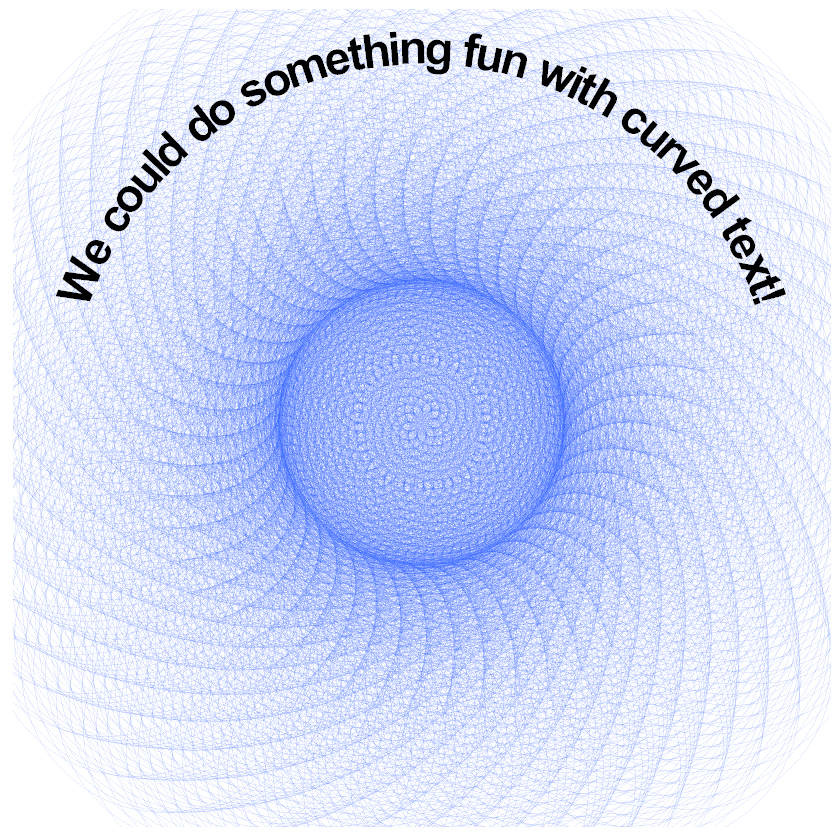

In [4]:
# Make a scatter plot of points in a spiral
plt <- ggplot() +
    # Points layer 1
    geom_point(data = spiral, aes(x_spiral*t, y_spiral*t), 
               size = 80, alpha = 0.1, shape = 1, color = "#1c51ff") + 
    # Remove axes, labels, etc.
    remove_axes +
    # Curved text layer
    geom_textpath(data = circle, aes(x_circle, y_circle), 
                  size = 10, label = "We could do something fun with curved text!", 
                  text_only = TRUE, fontface = "bold")

plt